### Plot emittance growth rates for different studies, uploaded from a pickle file

In [1]:
import sys
sys.path.append('../../utils/')
from cmptTheoreticalEmitGrowth import *
from bunchLengthConversions import *
import pickle
import numpy as np
import matplotlib.pyplot as plt

#### Plotting paramerters

In [2]:
params = {'legend.fontsize': 20,
          'figure.figsize': (9.5, 8.5),
          'axes.labelsize': 27,
          'axes.titlesize': 23,
          'xtick.labelsize': 27,
          'ytick.labelsize': 27,
          'image.cmap': 'jet',
          'lines.linewidth': 1,
          'lines.markersize': 10,
          'font.family': 'sans-serif'}

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)

#### 1) Define study parameters

In [4]:
n_runs = 3 # number of runs that the simulation was repeated
turns = 1e5
f_rev = 43375.86 # [Hz] The revolution frequency of the machine 
turns_list = np.arange(0,turns)
time = turns_list/f_rev # [s], type: list

In [5]:
my_start = 400.0
my_stop = 1.6e4
my_step = 800.0
my_variables = list(np.arange(my_start, my_stop, my_step))
# my_variables = ['']
my_variables.insert(0, 0.0)
print(my_variables)

[0.0, 400.0, 1200.0, 2000.0, 2800.0, 3600.0, 4400.0, 5200.0, 6000.0, 6800.0, 7600.0, 8400.0, 9200.0, 10000.0, 10800.0, 11600.0, 12400.0, 13200.0, 14000.0, 14800.0, 15600.0]


#### 2) Load data

In [8]:
path_to_data = './'
noise_type = 'PN'

study_name_1 = 'deyRates_globalCC2deg90_1MV_realNoise_PNCoast3PartC_1e5turns_Nb20k_nob3b5b7_QpyQpx0_scanayy'
#study_name_2 = 'deyRates_globalCC2deg90_1MV_realNoise_PNCoast3PartC_KlofKlod1_5e5turns_Nb20k_b3b5b7_QpyQpxIterate'


my_df1 = pickle.load( open(path_to_data+study_name_1+'.pkl', "rb" ) )
#my_df2 = pickle.load( open(path_to_data+study_name_2+'.pkl', "rb" ) )

In [10]:
my_df1

,ayy0.0,ayy400.0,ayy1200.0,ayy2000.0,ayy2800.0,ayy3600.0,ayy4400.0,ayy5200.0,ayy6000.0,ayy6800.0,...,ayy8400.0,ayy9200.0,ayy10000.0,ayy10800.0,ayy11600.0,ayy12400.0,ayy13200.0,ayy14000.0,ayy14800.0,ayy15600.0
m,"[1.6651345903953858e-08, 1.8344365568443774e-0...","[1.9332022549881485e-08, 2.045906067549651e-08...","[1.538861311621034e-08, 1.552632754407844e-08,...","[1.7048728588428725e-08, 1.870490517779558e-08...","[1.6155899589906792e-08, 1.8175299124391277e-0...","[1.4869728454416958e-08, 1.6209283409291386e-0...","[1.7632518671980514e-08, 1.4785184630869286e-0...","[1.8253385999043315e-08, 1.4775033575820563e-0...","[1.4438325410554038e-08, 1.8411664167806027e-0...","[1.5798930566112087e-08, 1.675441081772341e-08...",...,"[1.798625734971711e-08, 1.7304898666036706e-08...","[1.7629075965526397e-08, 1.8619092931803057e-0...","[1.4799995806795514e-08, 1.806718719683026e-08...","[1.886845317011165e-08, 1.5635822125870844e-08...","[1.7084370961622444e-08, 1.6102937499586357e-0...","[1.4770795626834908e-08, 1.594717141046578e-08...","[1.573064762589352e-08, 1.8467173788502383e-08...","[2.0881362483532258e-08, 1.800749975358654e-08...","[1.6433960902102937e-08, 1.616651823222866e-08...","[1.5446617161245327e-08, 1.8728555169303128e-0..."
b,"[2.0682871697947466e-06, 2.0504867188073024e-0...","[2.055111205707103e-06, 2.0524630141653685e-06...","[2.0781763197236063e-06, 2.0513684769222422e-0...","[2.0635016542328727e-06, 2.042805183605811e-06...","[2.077998916815779e-06, 2.0414757503946015e-06...","[2.091010358667956e-06, 2.0795967749021853e-06...","[2.0657710735688095e-06, 2.0847706856098754e-0...","[2.0670187824137443e-06, 2.070945478615871e-06...","[2.0686427828235968e-06, 2.0997565561720753e-0...","[2.028672532350703e-06, 2.0699275142622875e-06...",...,"[2.0807414723901725e-06, 2.0181267761410555e-0...","[2.0595400516719665e-06, 2.0845421266491612e-0...","[2.053155903048645e-06, 2.050787563529422e-06,...","[2.0287484223867314e-06, 2.085451815012359e-06...","[2.054478756777432e-06, 2.0743339760286066e-06...","[2.042626844399588e-06, 2.0695449575891044e-06...","[2.07276179549496e-06, 2.0436560944919332e-06,...","[2.0418632134723904e-06, 2.062751567096674e-06...","[2.0584656450440598e-06, 2.058565452945807e-06...","[2.0286258737924295e-06, 2.0623738683682103e-0..."
err,"[1.8122823337818012e-11, 1.3615929901910319e-1...","[1.887698930235757e-11, 1.9716305715489404e-11...","[1.756563618873939e-11, 1.3736008562211237e-11...","[1.7992018357631608e-11, 1.637740547135515e-11...","[1.8479256357824685e-11, 1.878683048458267e-11...","[1.7968912874722714e-11, 1.8787354127808114e-1...","[1.875928470164833e-11, 1.7900300558258243e-11...","[1.9021315305387165e-11, 1.635772578009142e-11...","[1.7299043624678722e-11, 1.7864235396083758e-1...","[2.0127344398502055e-11, 1.725235529779505e-11...",...,"[1.799201090181467e-11, 1.7902885562110943e-11...","[1.987845730940855e-11, 1.6608450545099902e-11...","[1.6926694863693458e-11, 1.7771124656019492e-1...","[1.818679261446185e-11, 1.801905524561322e-11,...","[1.8213031034665232e-11, 1.6929551273893132e-1...","[1.6258797417581318e-11, 1.7873700066086773e-1...","[1.7670988318088334e-11, 1.6884381540814604e-1...","[1.7687789421112983e-11, 1.678427749340302e-11...","[1.8452924146540192e-11, 1.730157669095654e-11...","[1.6249140896891003e-11, 1.79883065888858e-11,..."


In [11]:
my_df_keys = list(my_df1.keys()) # same keys for my_df1 and my_df2

In [12]:
my_df1[my_df_keys[7]]['m']

[1.8253385999043315e-08, 1.4775033575820563e-08, 2.2211048513640847e-08]

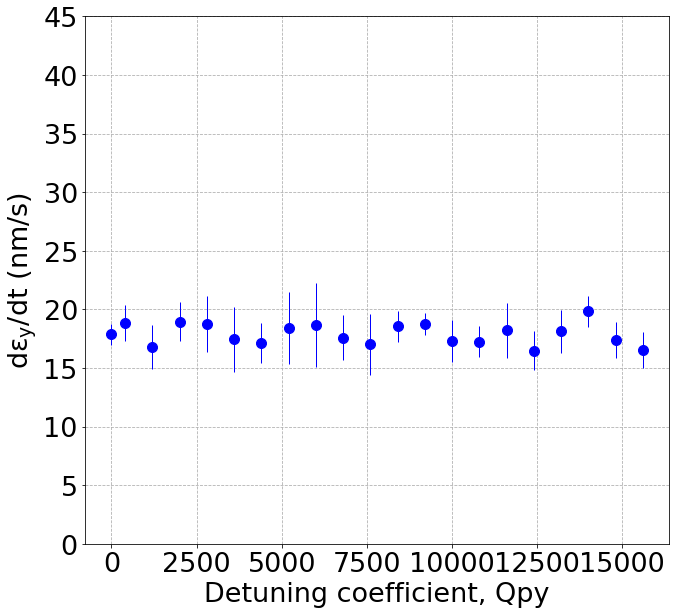

In [23]:
labels= ['ocutpoles OFF', 'klof=klod= 1 '+r'$\mathrm{m^{-4}}$']

for i, key in enumerate(my_df_keys):
    plt.errorbar(my_variables[i], np.mean(my_df1[my_df_keys[i]]['m'])*1e9, yerr=np.std(my_df1[my_df_keys[i]]['m'])*1e9, marker='o',  c='b', label='octupoles OFF')
    #plt.errorbar(my_variables[i], np.mean(my_df2[my_df_keys[i]]['m'])*1e9, yerr=np.std(my_df2[my_df_keys[i]]['m'])*1e9, marker='o',  c='g')
    
plt.ylim(0, 45)
plt.grid(linestyle='dashed')
plt.ylabel(r'$\mathrm{d\epsilon_y / dt \ (nm/s)}$')
plt.xlabel('Detuning coefficient, Qpy')
plt.tight_layout()


### Compute the theoretically expected growth 

In [24]:
# Machine parameters
betay = 73 # 73 m at CC2, 76 m at CC1
Vcc = 1e6 # V
Eb = 270e9 # eV
beta_0 = 0.999999
gamma_0 = 287.7
sigma_z = 0.139 # m
f_CC = 400.789e6 # CC frequency in Hz
clight = 299792458 # m/s
circumference = 6911.5623
frev = clight/circumference # Hz
A_phase = 1e-8 # rms kick in the simulation of the phase noise
A_amplitude = 0 # rms kick in the simulation of the amplitude noise
scale_factor = Eb/Vcc # scaling factor to rms noise, σ
# Compute the PSD in rad^2/Hz and V^2/Hz
PSD_phi = (A_phase * scale_factor)**2/frev # rad^2/Hz
PSD_phi = 1.42e-10
#PSD_phi = 1.4e-10
PSD_A = 3.99e-11 #(A_amplitude * scale_factor)**2/frev # V^2/Hz
print(PSD_phi, PSD_A)

1.42e-10 3.99e-11


In [25]:
# Compute the correction factor due to the bunch length
sigma_phi = bunch_length_m_to_rad(sigma_z, clight, f_CC)
CDeltaphi = cmpt_bunch_length_correction_factor(sigma_phi, 'PN')
CDeltaA = cmpt_bunch_length_correction_factor(sigma_phi, 'AN')
print('CDeltaPhi = {}, CDeltaA = {}'.format(CDeltaphi, CDeltaA))

if noise_type == 'PN':
    expected_growth = emit_growth_phase_noise(betay, Vcc, frev, Eb, CDeltaphi, PSD_phi)*beta_0*gamma_0 # m/s
    my_color = 'C0'
    fill_bewtween_color = 'lightblue'
elif noise_type == 'AN':
    expected_growth = emit_growth_amplitude_noise(betay, Vcc, frev, Eb, CDeltaA, PSD_A)*beta_0*gamma_0 # m/s
    my_color = 'C1'
    fill_bewtween_color = 'moccasin'
else:
    my_color = 'C2'
    expected_growth_1 = emit_growth_phase_noise(betay, Vcc, frev, Eb, CDeltaphi, PSD_phi)*beta_0*gamma_0 # m/s
    expected_growth_2 = emit_growth_amplitude_noise(betay, Vcc, frev, Eb, CDeltaA, PSD_A)*beta_0*gamma_0 # m/s
    expected_growth = expected_growth_1 + expected_growth_2

print('expected growth = {} nm/s'.format(expected_growth*1e9))

CDeltaPhi = 0.5327231543595903, CDeltaA = 0.23363842282020486
expected growth = 20.501405387414138 nm/s


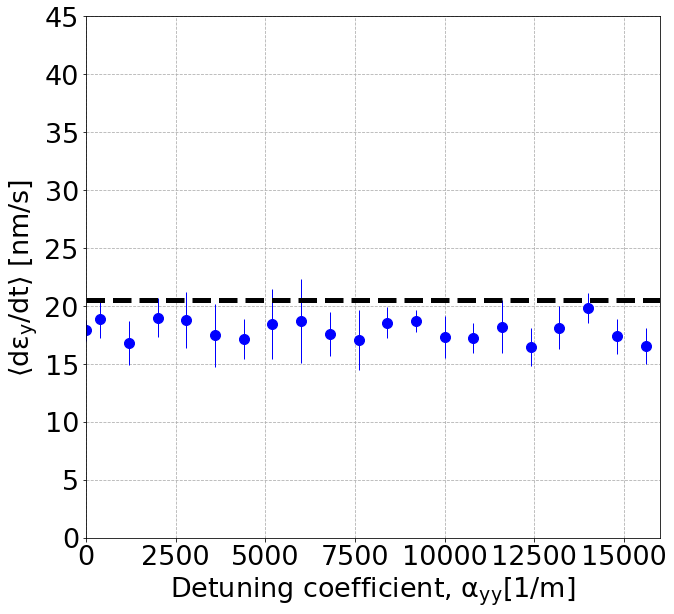

In [35]:
labels= ['ocutpoles OFF', 'klof=klod= 1 '+r'$\mathrm{m^{-4}}$']

for i, key in enumerate(my_df_keys):
    plt.errorbar(my_variables[i], np.mean(my_df1[my_df_keys[i]]['m'])*1e9, yerr=np.std(my_df1[my_df_keys[i]]['m'])*1e9, marker='o',  c='b', label='octupoles OFF')
    #plt.errorbar(my_variables[i], np.mean(my_df2[my_df_keys[i]]['m'])*1e9, yerr=np.std(my_df2[my_df_keys[i]]['m'])*1e9, marker='o',  c='g')
    
plt.hlines(expected_growth*1e9, -1, 16000, linestyle='dashed', lw=5)

plt.xlim(-2, 16000)
plt.ylim(0, 45)
plt.grid(linestyle='dashed')
plt.ylabel(r'$\mathrm{\langle d\epsilon_y / dt \rangle \ [nm/s]}$')
plt.xlabel('Detuning coefficient, '+r'$\mathrm{\alpha_{yy} [1/m]}$')
plt.tight_layout()
plt.savefig('test.png')

compute tune spread from chroma and octupoles and chromatic sextupoles 

chromatic effect is not importnat, the detuning from the chromatic sextupoles is differnet at each case ??